In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
D = pd.read_csv("2017-18_AdvancedStats_Salary.csv", encoding= 'unicode_escape',
                usecols =["Player","Tm","Age","G","MP","PER","WS","BPM","Salary"])
print("shape of selected dataset is:",D.shape)

D.head()

shape of selected dataset is: (651, 9)


,Player,Salary,Age,Tm,G,MP,PER,WS,BPM
0,Zhou Qi,"$815,615",22,HOU,16,87,0.6,-0.2,-10.1
1,Zaza Pachulia,"$3,477,600",33,GSW,66,937,16.8,3.1,0.8
2,Zach Randolph,"$12,307,692",36,SAC,59,1508,17.3,1.4,-1.9
3,Zach LaVine,"$3,202,217",22,CHI,24,656,14.6,0.4,-2.6
4,Zach Collins,"$3,057,240",20,POR,62,979,8.2,0.8,-2.9


In [3]:
# delete rows containing any NULL value
D.dropna(axis=0, inplace=True)
print("shape of current dataset is:",D.shape)

shape of current dataset is: (651, 9)


In [4]:
## check for duplicates in Player names and keep only the row with value "TOT" of "Tm" column, then
## convert panda df into np array

# find rows with Tm = "TOT"
rows_TOT = D[D['Tm'] == "TOT"] 
print("shape of rows with Tm=TOT",rows_TOT.shape)

# drop all duplicate rows
D.drop_duplicates(subset="Player", keep=False, inplace=True)
print("after dropping NULL shape is:", D.shape)

# add the duplicate rows with "TOT" Tm value back to dataframe
D_noDuplicate = pd.concat([D,rows_TOT])
D_noDuplicate.reset_index(drop=True, inplace=True)
print("shape of dataset after removing duplicates and keep TOT rows is:",D_noDuplicate.shape)

# keep columns ["Player","Age","G","MP","PER","WS","BPM"] 
df_X = D_noDuplicate[["Player","Age","G","MP","PER","WS","BPM"]] 
df_Y = D_noDuplicate[["Salary"]] 
print("shape of useful information df is:", df_X.shape)

# convert panda df to np array and use all columns except "Player"(player name)
X = df_X.to_numpy()
Y = df_Y.to_numpy()
X_noName = X[:,1:]
print("shape of nd array after remove 'Player name' column is:", X_noName.shape)

shape of rows with Tm=TOT (57, 9)
after dropping NULL shape is: (474, 9)
shape of dataset after removing duplicates and keep TOT rows is: (531, 9)
shape of useful information df is: (531, 7)
shape of nd array after remove 'Player name' column is: (531, 6)


In [5]:
## Covariance matrix calculation

X_noName = X_noName.T
m,n = X_noName.shape
print("m =",m, "n =",n)

# Find the mean of the data
mean6d = np.mean(X_noName,1)
mean6d = mean6d.reshape(1,6)
print("mean of the data is :", mean6d)
print("dimensions of mean6d is:", mean6d.shape)
# Create Z, the zero-meaned data matrix
Z = X_noName - np.tile(mean6d,(n,1)).T

# calculate the covariance matrix of Z
C = np.matmul(Z,Z.T)/(n-1)
print("Covariance matric shape is:", C.shape)
print("Covariance matrix is:", C)

m = 6 n = 531
mean of the data is : [[26.071563088512242 46.89265536723164 1067.4293785310736
  12.897740112994349 2.253672316384179 -2.080037664783428]]
dimensions of mean6d is: (1, 6)
Covariance matric shape is: (6, 6)
Covariance matrix is: [[17.357133212521752 14.288828483104156 421.81449738833834
  1.2716714635966315 1.598793305617739 1.8525310023807007]
 [14.288828483104156 685.2167572753441 19220.599008634465
  58.56070035177483 45.17728173968663 68.71705255303277]
 [421.81449738833834 19220.599008634465 683332.9586824437
  2251.6445570834685 1734.9880428525726 2225.1772614859833]
 [1.2716714635966315 58.56070035177483 2251.6445570834685
  80.35078733610491 10.156649824112568 45.59155463170235]
 [1.598793305617739 45.17728173968663 1734.9880428525726
  10.156649824112568 6.962453469779336 8.036134100842132]
 [1.8525310023807007 68.71705255303277 2225.1772614859833
  45.59155463170235 8.036134100842132 36.94246867782395]]


In [6]:
for i in range(len(Y)):
    Y[i][0] = float(Y[i][0].replace(('$'), '').replace((','), ''))

In [7]:
print(Y.shape)

(531, 1)


In [8]:
# augumented data matrix
ones = np.ones(n).reshape(-1,1)
X = np.concatenate([ones,X_noName.T], axis=-1)
print("X shape: ", X.shape)

X shape:  (531, 7)


In [9]:
X = X.astype(float)
Y = Y.astype(float)

In [10]:
train_num = int(n * 0.8)
ids = np.random.choice(list(range(n)), n, replace=False)
train_ids = ids[:train_num]
test_ids = ids[train_num:]

X_train = X[train_ids]
X_test = X[test_ids]

Y_train = Y[train_ids]
# .reshape(-1)
Y_test = Y[test_ids]
# .reshape(-1)

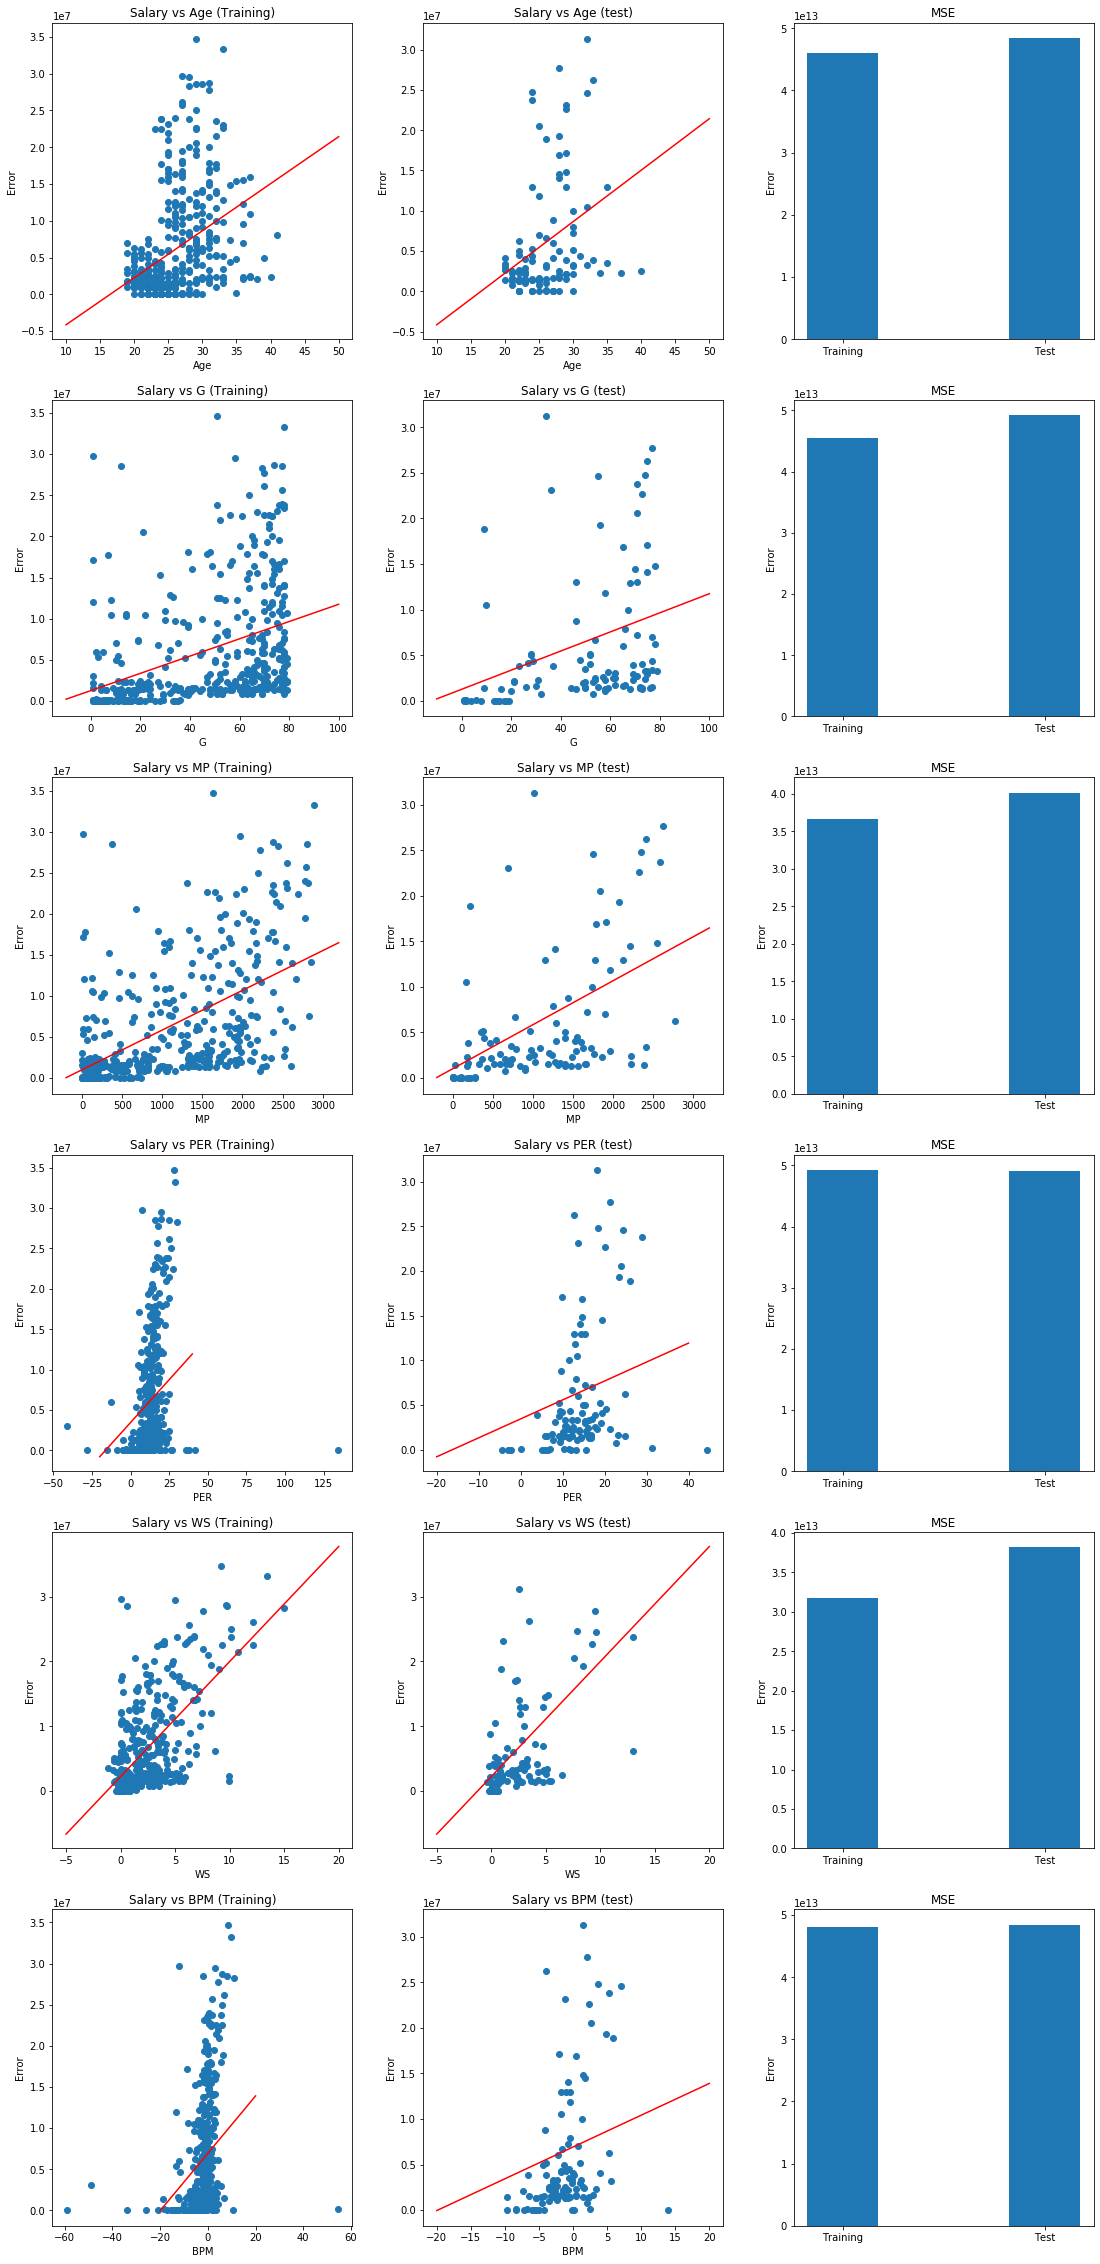

In [11]:
# Single Variable Linear Regression
plot_x = [50, 100, 3200, 40, 20, 20]
plot_x_start = [10, -10, -200, -20,-5, -20]
# x = np.linspace(0,200, num=1000)
x_label = ["Age", "G","MP","PER","WS","BPM"]
fig, ax = plt.subplots(6,3, figsize=(16,32))
fig.tight_layout(pad=4)

for i in range(1,7):
    w = np.linalg.lstsq(X_train[:,[0,i]], Y_train, rcond=None)[0]
    
    # visualization for training data, test data, mse error
    MSE1 = np.mean((np.matmul(X_train[:,[0,i]], w) - Y_train)**2)
    MSE2 = np.mean((np.matmul(X_test[:,[0,i]], w) - Y_test)**2)

    x = np.linspace(plot_x_start[i-1],plot_x[i-1], num=1000)
    y_hat = w[0] + w[1] * x
    
    ax[i-1][0].plot(x, y_hat,'r')
    ax[i-1][0].scatter(X_train[:,[i]], Y_train)
    ax[i-1][0].set_title('Salary vs ' + x_label[i-1] + " (Training)")
    ax[i-1][0].set_xlabel(x_label[i-1])
    ax[i-1][0].set_ylabel("Error")
    
    ax[i-1][1].plot(x, y_hat,'r')
    ax[i-1][1].scatter(X_test[:,[i]], Y_test)
    ax[i-1][1].set_title('Salary vs ' + x_label[i-1] + " (test)")
    ax[i-1][1].set_xlabel(x_label[i-1])
    ax[i-1][1].set_ylabel("Error")
    
    ind = [1,2]   # the x locations for the groups
    width = 0.35         # the width of the bars
    MSE = [MSE1, MSE2]
    p1 = ax[i-1][2].bar(ind, MSE, width)

    ax[i-1][2].set_title('MSE')
    ax[i-1][2].set_xticks(ind)
    ax[i-1][2].set_xticklabels(('Training', 'Test'))
    ax[i-1][2].set_ylabel("Error")
    # ax.autoscale_view()


In [37]:
# Multivariate Linear Regression
ones = np.ones(len(X_train)).reshape(len(X_train),1)
squares = np.square(X_train)
cubes = np.power(X_train, 3)
A1 = np.hstack([ones, X_train])
A2 = np.hstack([ones, X_train, squares])
A3 = np.hstack([ones, X_train, squares, cubes])
w1 = np.linalg.lstsq(A1,Y_train,rcond=None)[0]
w2 = np.linalg.lstsq(A2,Y_train,rcond=None)[0]
w3 = np.linalg.lstsq(A3,Y_train,rcond=None)[0]
print("The parameters of first order is:",w1)
print("The parameters of second order is:",w2)
print("The parameters of third order is:",w3)

The parameters of first order is: [[-4.58282377e+06]
 [-4.58282377e+06]
 [ 4.97521730e+05]
 [-1.35110977e+05]
 [ 5.47973782e+03]
 [ 2.74059808e+04]
 [ 1.10828967e+06]
 [ 4.46671714e+03]]
The parameters of second order is: [[-1.32072996e+07]
 [-1.32072996e+07]
 [ 2.51268778e+06]
 [ 1.37471027e+04]
 [ 7.55190511e+03]
 [ 1.33177403e+05]
 [ 1.34051762e+05]
 [-8.70502466e+04]
 [-1.32072996e+07]
 [-3.62562145e+04]
 [-1.90119232e+03]
 [-3.33113840e-01]
 [-7.68528656e+02]
 [ 7.96440004e+04]
 [ 2.15463010e+02]]
The parameters of third order is: [[ 2.01774505e+07]
 [ 2.01774830e+07]
 [-1.06058223e+07]
 [-1.93093279e+05]
 [ 1.50605468e+04]
 [ 1.59192634e+05]
 [-4.81636712e+05]
 [ 8.06864151e+02]
 [ 2.01774505e+07]
 [ 4.33876545e+05]
 [ 2.79263855e+03]
 [-6.60894761e+00]
 [-1.87140467e+03]
 [ 2.34179529e+05]
 [ 8.31916883e+03]
 [ 2.01774505e+07]
 [-5.48981119e+03]
 [-3.25055253e+01]
 [ 1.44474014e-03]
 [-1.28640249e+01]
 [-9.61584011e+03]
 [ 1.15057729e+02]]


In [38]:
y_pred1_train = np.matmul(A1, w1)
y_pred2_train = np.matmul(A2, w2)
y_pred3_train = np.matmul(A3, w3)

In [39]:
MSE1_train = np.mean(np.square(Y_train - y_pred1_train))
MSE2_train = np.mean(np.square(Y_train - y_pred2_train))
MSE3_train = np.mean(np.square(Y_train - y_pred3_train))
print("The Training MSE of first order is:",MSE1_train)
print("The Training MSE of second order is:",MSE2_train)
print("The Training MSE of third order is:",MSE3_train)

The Training MSE of first order is: 24877316655703.484
The Training MSE of second order is: 22981842324109.2
The Training MSE of third order is: 21978805337947.41


In [40]:
onesT = np.ones(len(X_test)).reshape(len(X_test),1)
squaresT = np.square(X_test)
cubesT = np.power(X_test, 3)
A1T = np.hstack([onesT, X_test])
A2T = np.hstack([onesT, X_test, squaresT])
A3T = np.hstack([onesT, X_test, squaresT, cubesT])
y_pred1_test = np.matmul(A1T, w1)
y_pred2_test = np.matmul(A2T, w2)
y_pred3_test = np.matmul(A3T, w3)

In [41]:
MSE1_test = np.mean(np.square(Y_test - y_pred1_test))
MSE2_test = np.mean(np.square(Y_test - y_pred2_test))
MSE3_test = np.mean(np.square(Y_test - y_pred3_test))
print("The testing MSE of first order is:",MSE1_test)
print("The testing MSE of second order is:",MSE2_test)
print("The testing MSE of third order is:",MSE3_test)

The testing MSE of first order is: 29751894607189.324
The testing MSE of second order is: 28130909857391.023
The testing MSE of third order is: 26884428395987.53
